# Random Walk Dataset

This synthetically generated random walk dataset is a collection of 70 individual time series, each involving 500 time steps. This dataset is generated using the random walk process, a statistical phenomenon often encountered in fields as varied as physics and finance, where each point in the series is a sum of its predecessor and a random fluctuation. Each random fluctuation at every step is drawn independently from a normal distribution, and this process is independent of the current state or any past steps.

This dataset is a valuable resource to explore the principles and applications of random walks processes for timeseries analysis.

In [12]:
import numpy as np
import pandas as pd
from typing import List
import random
import string
import matplotlib.pyplot as plt
import os
from typing import Tuple, Union
%matplotlib inline

In [13]:
dataset_name = "random_walk"

In [14]:
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Functions to generate data

In [15]:
def generate_series(num_series, num_time_steps):
    # Helper function to generate a unique series_id
    def generate_id(size=8, chars=string.ascii_uppercase + string.digits):
        return ''.join(random.choice(chars) for _ in range(size))
    
    all_series = []  # List to store dataframes for each series
    
    for i in range(num_series):
        # Generate random walk
        epsilon = np.random.normal(scale=0.25, size=num_time_steps - 1)
        random_walk = np.concatenate(([0], np.cumsum(epsilon)))        
        series_id = f"series_{i}"
        series_data = pd.DataFrame({
            "series_id": [series_id for _ in range(num_time_steps)],
            "time_step": np.arange(num_time_steps)+1,
            "value": random_walk
        })        
        all_series.append(series_data)        
    # Concatenate all series into a single dataframe
    df = pd.concat(all_series, ignore_index=True)        
    return df

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
    
# Generate the data using the provided specifications
data = generate_series(num_series=70, num_time_steps=500)
data.head()

,series_id,time_step,value
0,series_0,1,0.000000
1,series_0,2,0.124179
2,series_0,3,0.089612
3,series_0,4,0.251535
4,series_0,5,0.632292


In [16]:
# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
    
# Generate the data using the provided specifications
data = generate_series(num_series=70, num_time_steps=500)
data.head()

,series_id,time_step,value
0,series_0,1,0.000000
1,series_0,2,0.124179
2,series_0,3,0.089612
3,series_0,4,0.251535
4,series_0,5,0.632292


In [17]:
series_col = "series_id"
epoch_col = 'time_step'
time_col = None
value_col = 'value'
exog_cols=[]

# Visualize Data

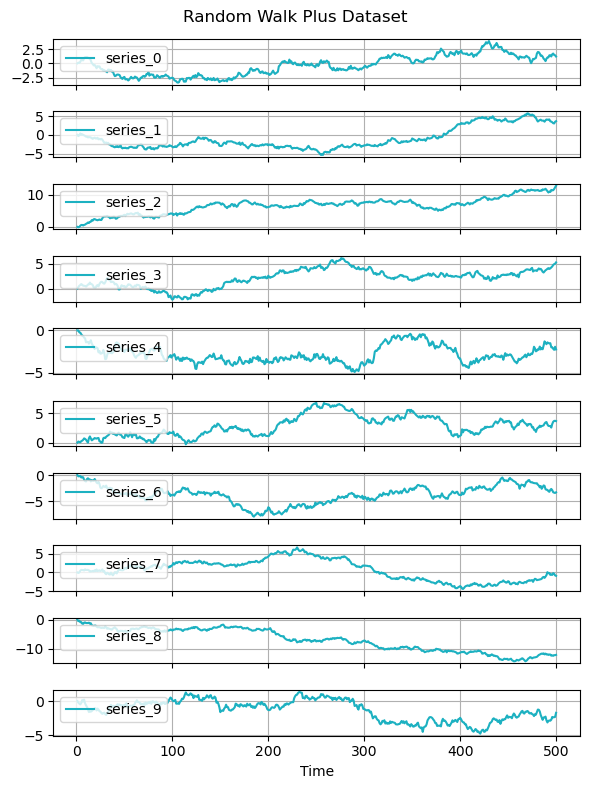

In [18]:
def visualize_series(df: pd.DataFrame, filename: str=None, max_series: int=10) -> None:
    """
    Visualizes the series in the provided DataFrame using subplots and saves the plot as a PNG file.
    
    Args:
    - df (pd.DataFrame): DataFrame containing the series data with columns series_id, t, and y.
    - filename (str): Name of the file to save the plot.
    
    Returns:
    - None
    """
    t = df['time_step'].unique()
    unique_series = sorted(df['series_id'].unique())
    
    fig, axes = plt.subplots(nrows=len(unique_series[:max_series]), ncols=1, figsize=(6, 8), sharex=True)

    for i, _ in enumerate(unique_series[:max_series]):
        series_id = f"series_{i}"
        y = df[df['series_id'] == series_id]['value'].values
        axes[i].plot(t, y, label=series_id, color="#1db1c1")
        axes[i].legend(loc="upper left")
        axes[i].grid(True)

    axes[-1].set_xlabel("Time")
    fig.suptitle("Random Walk Plus Dataset", y=0.98)
    plt.tight_layout()
    
    # Save the figure
    if filename is not None:
        plt.savefig(filename)
    # Display the plot in Jupyter Notebook
    #plt.show()

# Visualize
visualize_series(data, outp_fig_fname, max_series=10)

# Save Main Data File

In [19]:
all_cols = [series_col, epoch_col, value_col] + exog_cols    
data.sort_values(by=[series_col, epoch_col], inplace=True)
data[all_cols].to_csv(outp_fname, index=False, float_format="%.3f")

In [20]:
data[all_cols].head()

,series_id,time_step,value
0,series_0,1,0.000000
1,series_0,2,0.124179
2,series_0,3,0.089612
3,series_0,4,0.251535
4,series_0,5,0.632292
